In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
plt.style.use('ggplot')

In [2]:
%time df = pd.read_feather('tmp/raw_processed')
df.head(3)

CPU times: total: 188 ms
Wall time: 71.3 ms


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,Transmission,Hydraulics,Tire_Size,Undercarriage_Pad_Width,Stick_Length,Blade_Type,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na,UsageBand_High,UsageBand_Medium,UsageBand_Low,UsageBand_nan,ProductSize_Compact,ProductSize_Large,ProductSize_Large / Medium,ProductSize_Medium,ProductSize_Mini,ProductSize_Small,ProductSize_nan,ProductGroup_BL,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL,ProductGroup_nan,ProductGroupDesc_Backhoe Loaders,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader,ProductGroupDesc_nan,Drive_System_All Wheel Drive,Drive_System_Four Wheel Drive,Drive_System_No,Drive_System_Two Wheel Drive,Drive_System_nan,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS,Enclosure_nan,Forks_None or Unspecified,Forks_Yes,Forks_nan,Pad_Type_Grouser,Pad_Type_None or Unspecified,Pad_Type_Reversible,Pad_Type_Street,Pad_Type_nan,Ride_Control_No,Ride_Control_None or Unspecified,Ride_Control_Yes,Ride_Control_nan,Stick_Extended,Stick_Standard,Stick_nan,Turbocharged_None or Unspecified,Turbocharged_Yes,Turbocharged_nan,Blade_Extension_None or Unspecified,Blade_Extension_Yes,Blade_Extension_nan,Blade_Width_12',Blade_Width_13',Blade_Width_14',Blade_Width_16',Blade_Width_<12',Blade_Width_None or Unspecified,Blade_Width_nan,Enclosure_Type_High Profile,Enclosure_Type_Low Profile,Enclosure_Type_None or Unspecified,Enclosure_Type_nan,Engine_Horsepower_No,Engine_Horsepower_Variable,Engine_Horsepower_nan,Pushblock_None or Unspecified,Pushblock_Yes,Pushblock_nan,Ripper_Multi Shank,Ripper_None or Unspecified,Ripper_Single Shank,Ripper_Yes,Ripper_nan,Scarifier_None or Unspecified,Scarifier_Yes,Scarifier_nan,Tip_Control_None or Unspecified,Tip_Control_Sideshift & Tip,Tip_Control_Tip,Tip_Control_nan,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified,Coupler_nan,Coupler_System_None or Unspecified,Coupler_System_Yes,Coupler_System_nan,Grouser_Tracks_None or Unspecified,Grouser_Tracks_Yes,Grouser_Tracks_nan,Hydraulics_Flow_High Flow,Hydraulics_Flow_None or Unspecified,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Track_Type_Rubber,Track_Type_Steel,Track_Type_nan,Thumb_Hydraulic,Thumb_Manual,Thumb_None or Unspecified,Thumb_nan,Pattern_Changer_No,Pattern_Changer_None or Unspecified,Pattern_Changer_Yes,Pattern_Changer_nan,Grouser_Type_Double,Grouser_Type_Single,Grouser_Type_Triple,Grouser_Type_nan,Backhoe_Mounting_None or Unspecified,Backhoe_Mounting_Yes,Backhoe_Mounting_nan,Travel_Controls_1 Speed,Travel_Controls_2 Pedal,Travel_Controls_Differential Steer,Travel_Controls_Finger Tip,Travel_Controls_Lever,Travel_Controls_None or Unspecified,Travel_Controls_Pedal,Travel_Controls_nan,Differential_Type_Limited Slip,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Differential_Type_nan,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel,Steering_Controls_nan
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,963,298,43,0,0,59,1,0,1,17,0,0,0,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,Fals

In [3]:
df.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [4]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,Transmission,Hydraulics,Tire_Size,Undercarriage_Pad_Width,Stick_Length,Blade_Type,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,412698.000000,412698.000000,4.126980e+05,412698.000000,412698.00000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,4.126980e+05
mean,2.011161e+06,10.105977,1.230061e+06,6947.201828,135.169361,6.361548,1899.049637,1.259165e+03,1697.462231,563.29233,37.889057,9.251654,12.415800,32.283975,23.452953,3.362330,4.240161,3.067386,4.326442,6.554817,1.273566,2004.317382,6.300268,25.721191,16.152894,2.594338,176.784094,1.098151e+09
std,1.080068e+06,0.695005,4.539533e+05,6280.824982,9.646749,16.763713,292.190243,1.633077e+04,1281.860399,473.19856,39.006742,27.098488,29.317979,22.584872,15.730291,3.762273,4.793618,5.957234,7.755279,11.938639,2.644549,5.821090,3.437276,14.841265,8.429510,1.417971,103.910718,1.834467e+08
min,1.139246e+06,8.465900,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.009984e+08
25%,1.421898e+06,9.581904,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,640.000000,208.00000,0.000000,0.000000,0.000000,11.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,12.000000,9.000000,2.000000,82.000000,9.760608e+08
50%,1.645852e+06,10.085809,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,1413.000000,408.00000,31.000000,0.000000,0.000000,35.000000,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,6.000000,24.000000,16.000000,3.000000,165.000000,1.151453e+09
75%,2.261012e+06,10.596635,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,0.000000e+00,2316.000000,706.00000,59.000000,0.000000,0.000000,52.000000,41.000000,8.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,9.000000,39.000000,23.000000,3.000000,270.000000,1.243469e+09
max,6.333349e+06,11.863582,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,5059.000000,1961.00000,177.000000,123.000000,140.000000,74.000000,53.000000,8.000000,12.000000,17.000000,19.000000,29.000000,10.000000,2012.000000,12.000000,53.000000,31.000000,6.000000,365.000000,1.335571e+09


In [5]:
df.loc[df['YearMade'] < 1930, 'YearMade'] = 1930
df['age'] = df.saleYear - df.YearMade
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,Transmission,Hydraulics,Tire_Size,Undercarriage_Pad_Width,Stick_Length,Blade_Type,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na,UsageBand_High,UsageBand_Medium,UsageBand_Low,UsageBand_nan,ProductSize_Compact,ProductSize_Large,ProductSize_Large / Medium,ProductSize_Medium,ProductSize_Mini,ProductSize_Small,ProductSize_nan,ProductGroup_BL,ProductGroup_MG,ProductGroup_SSL,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL,ProductGroup_nan,ProductGroupDesc_Backhoe Loaders,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader,ProductGroupDesc_nan,Drive_System_All Wheel Drive,Drive_System_Four Wheel Drive,Drive_System_No,Drive_System_Two Wheel Drive,Drive_System_nan,Enclosure_EROPS,Enclosure_EROPS AC,Enclosure_EROPS w AC,Enclosure_NO ROPS,Enclosure_None or Unspecified,Enclosure_OROPS,Enclosure_nan,Forks_None or Unspecified,Forks_Yes,Forks_nan,Pad_Type_Grouser,Pad_Type_None or Unspecified,Pad_Type_Reversible,Pad_Type_Street,Pad_Type_nan,Ride_Control_No,Ride_Control_None or Unspecified,Ride_Control_Yes,Ride_Control_nan,Stick_Extended,Stick_Standard,Stick_nan,Turbocharged_None or Unspecified,Turbocharged_Yes,Turbocharged_nan,Blade_Extension_None or Unspecified,Blade_Extension_Yes,Blade_Extension_nan,Blade_Width_12',Blade_Width_13',Blade_Width_14',Blade_Width_16',Blade_Width_<12',Blade_Width_None or Unspecified,Blade_Width_nan,Enclosure_Type_High Profile,Enclosure_Type_Low Profile,Enclosure_Type_None or Unspecified,Enclosure_Type_nan,Engine_Horsepower_No,Engine_Horsepower_Variable,Engine_Horsepower_nan,Pushblock_None or Unspecified,Pushblock_Yes,Pushblock_nan,Ripper_Multi Shank,Ripper_None or Unspecified,Ripper_Single Shank,Ripper_Yes,Ripper_nan,Scarifier_None or Unspecified,Scarifier_Yes,Scarifier_nan,Tip_Control_None or Unspecified,Tip_Control_Sideshift & Tip,Tip_Control_Tip,Tip_Control_nan,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified,Coupler_nan,Coupler_System_None or Unspecified,Coupler_System_Yes,Coupler_System_nan,Grouser_Tracks_None or Unspecified,Grouser_Tracks_Yes,Grouser_Tracks_nan,Hydraulics_Flow_High Flow,Hydraulics_Flow_None or Unspecified,Hydraulics_Flow_Standard,Hydraulics_Flow_nan,Track_Type_Rubber,Track_Type_Steel,Track_Type_nan,Thumb_Hydraulic,Thumb_Manual,Thumb_None or Unspecified,Thumb_nan,Pattern_Changer_No,Pattern_Changer_None or Unspecified,Pattern_Changer_Yes,Pattern_Changer_nan,Grouser_Type_Double,Grouser_Type_Single,Grouser_Type_Triple,Grouser_Type_nan,Backhoe_Mounting_None or Unspecified,Backhoe_Mounting_Yes,Backhoe_Mounting_nan,Travel_Controls_1 Speed,Travel_Controls_2 Pedal,Travel_Controls_Differential Steer,Travel_Controls_Finger Tip,Travel_Controls_Lever,Travel_Controls_None or Unspecified,Travel_Controls_Pedal,Travel_Controls_nan,Differential_Type_Limited Slip,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Differential_Type_nan,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel,Steering_Controls_nan,age
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,963,298,43,0,0,59,1,0,1,17,0,0,0,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,

In [6]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,state,Transmission,Hydraulics,Tire_Size,Undercarriage_Pad_Width,Stick_Length,Blade_Type,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,age
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,412698.000000,412698.000000,4.126980e+05,412698.000000,412698.00000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,412698.000000,4.126980e+05,412698.000000
mean,2.011161e+06,10.105977,1.230061e+06,6947.201828,135.169361,6.361548,1987.819626,1.259165e+03,1697.462231,563.29233,37.889057,9.251654,12.415800,32.283975,23.452953,3.362330,4.240161,3.067386,4.326442,6.554817,1.273566,2004.317382,6.300268,25.721191,16.152894,2.594338,176.784094,1.098151e+09,16.497756
std,1.080068e+06,0.695005,4.539533e+05,6280.824982,9.646749,16.763713,20.908080,1.633077e+04,1281.860399,473.19856,39.006742,27.098488,29.317979,22.584872,15.730291,3.762273,4.793618,5.957234,7.755279,11.938639,2.644549,5.821090,3.437276,14.841265,8.429510,1.417971,103.910718,1.834467e+08,20.499279
min,1.139246e+06,8.465900,0.000000e+00,28.000000,121.000000,0.000000,1930.000000,0.000000e+00,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.009984e+08,-12.000000
25%,1.421898e+06,9.581904,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,640.000000,208.00000,0.000000,0.000000,0.000000,11.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,12.000000,9.000000,2.000000,82.000000,9.760608e+08,5.000000
50%,1.645852e+06,10.085809,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,1413.000000,408.00000,31.000000,0.000000,0.000000,35.000000,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,6.000000,24.000000,16.000000,3.000000,165.000000,1.151453e+09,9.000000
75%,2.261012e+06,10.596635,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,0.000000e+00,2316.000000,706.00000,59.000000,0.000000,0.000000,52.000000,41.000000,8.000000,12.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,9.000000,39.000000,23.000000,3.000000,270.000000,1.243469e+09,16.000000
max,6.333349e+06,11.863582,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06,5059.000000,1961.00000,177.000000,123.000000,140.000000,74.000000,53.000000,8.000000,12.000000,17.000000,19.000000,29.000000,10.000000,2012.000000,12.000000,53.000000,31.000000,6.000000,365.000000,1.335571e+09,82.000000


## Input/Output & Train/Validation

In [7]:
X = df.drop(["SalePrice"], axis=1)
y = df.SalePrice

In [8]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

In [9]:
n_valid = 12000
n_trn = len(df) - n_valid
train, valid = split_vals(df, n_trn)
train.shape, valid.shape

((400698, 175), (12000, 175))

In [10]:
X_train = train.drop(["SalePrice"], axis=1)
y_train = train.SalePrice
X_valid = valid.drop(["SalePrice"], axis=1)
y_valid = valid.SalePrice

In [11]:
X_valid.shape, y_valid.shape

((12000, 174), (12000,))

In [12]:
X_train.shape, y_train.shape

((400698, 174), (400698,))

## Make a prototype model

In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=40, n_jobs=-1, min_samples_leaf=3, max_features=0.5, oob_score=True
                              , max_samples=50000)

In [14]:
%time model.fit(X_train, y_train)

CPU times: total: 50.7 s
Wall time: 18.3 s


RandomForestRegressor(max_features=0.5, max_samples=50000, min_samples_leaf=3,
                      n_estimators=40, n_jobs=-1, oob_score=True)

## Evaluation

In [15]:
import math
from sklearn.metrics import r2_score

In [16]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [17]:
def print_score(model):
    res = [rmse(model.predict(X_train), y_train), rmse(model.predict(X_valid), y_valid),
           r2_score(model.predict(X_train), y_train), r2_score(model.predict(X_valid), y_valid)]
    if model.oob_score:
        res.append(model.oob_score_)
    return res

In [18]:
print_score(model)

[0.20777498751960774,
 0.27339293107240376,
 0.8946066235180233,
 0.8167660241858986,
 0.893411205427949]

## Feature Importance

In [19]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [20]:
fi = rf_feat_importance(model, X)
fi[:10]

,cols,imp
67,Enclosure_EROPS w AC,0.151708
173,age,0.119472
48,ProductGroup_SSL,0.065332
12,fiProductClassDesc,0.064812
55,ProductGroupDesc_Skid Steer Loaders,0.059268
2,ModelID,0.059097
5,YearMade,0.057043
43,ProductSize_Mini,0.048397
128,Coupler_System_nan,0.043581
9,fiSecondaryDesc,0.032091


<Axes: xlabel='cols'>

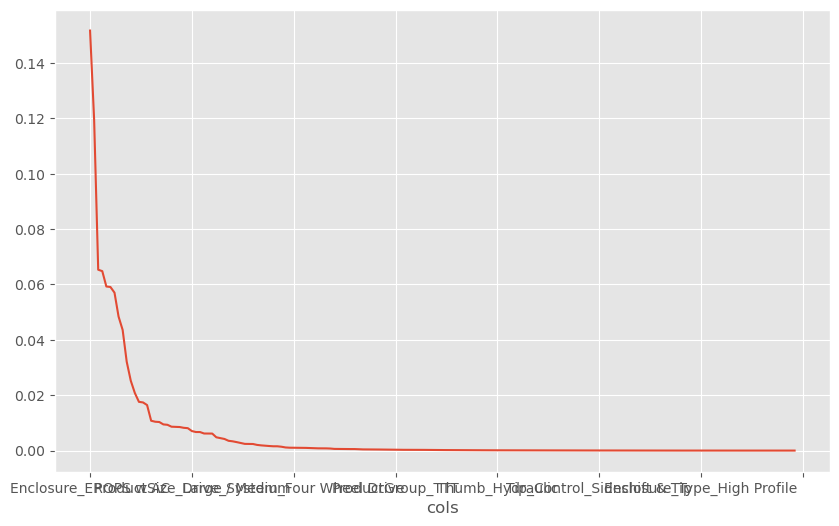

In [21]:
fi.plot('cols', 'imp', figsize=(10, 6), legend=False)

<Axes: ylabel='cols'>

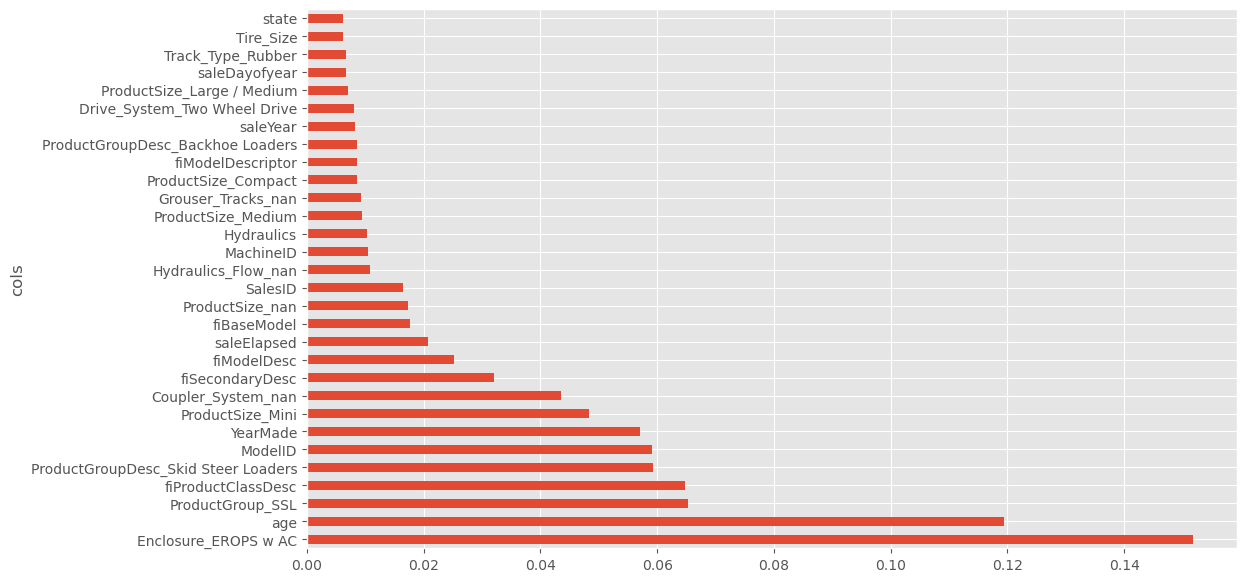

In [22]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

In [23]:
to_keep = fi[fi.imp > 0.005].cols
X_keep = df[to_keep]
len(to_keep)

31

## Remove Duplicates

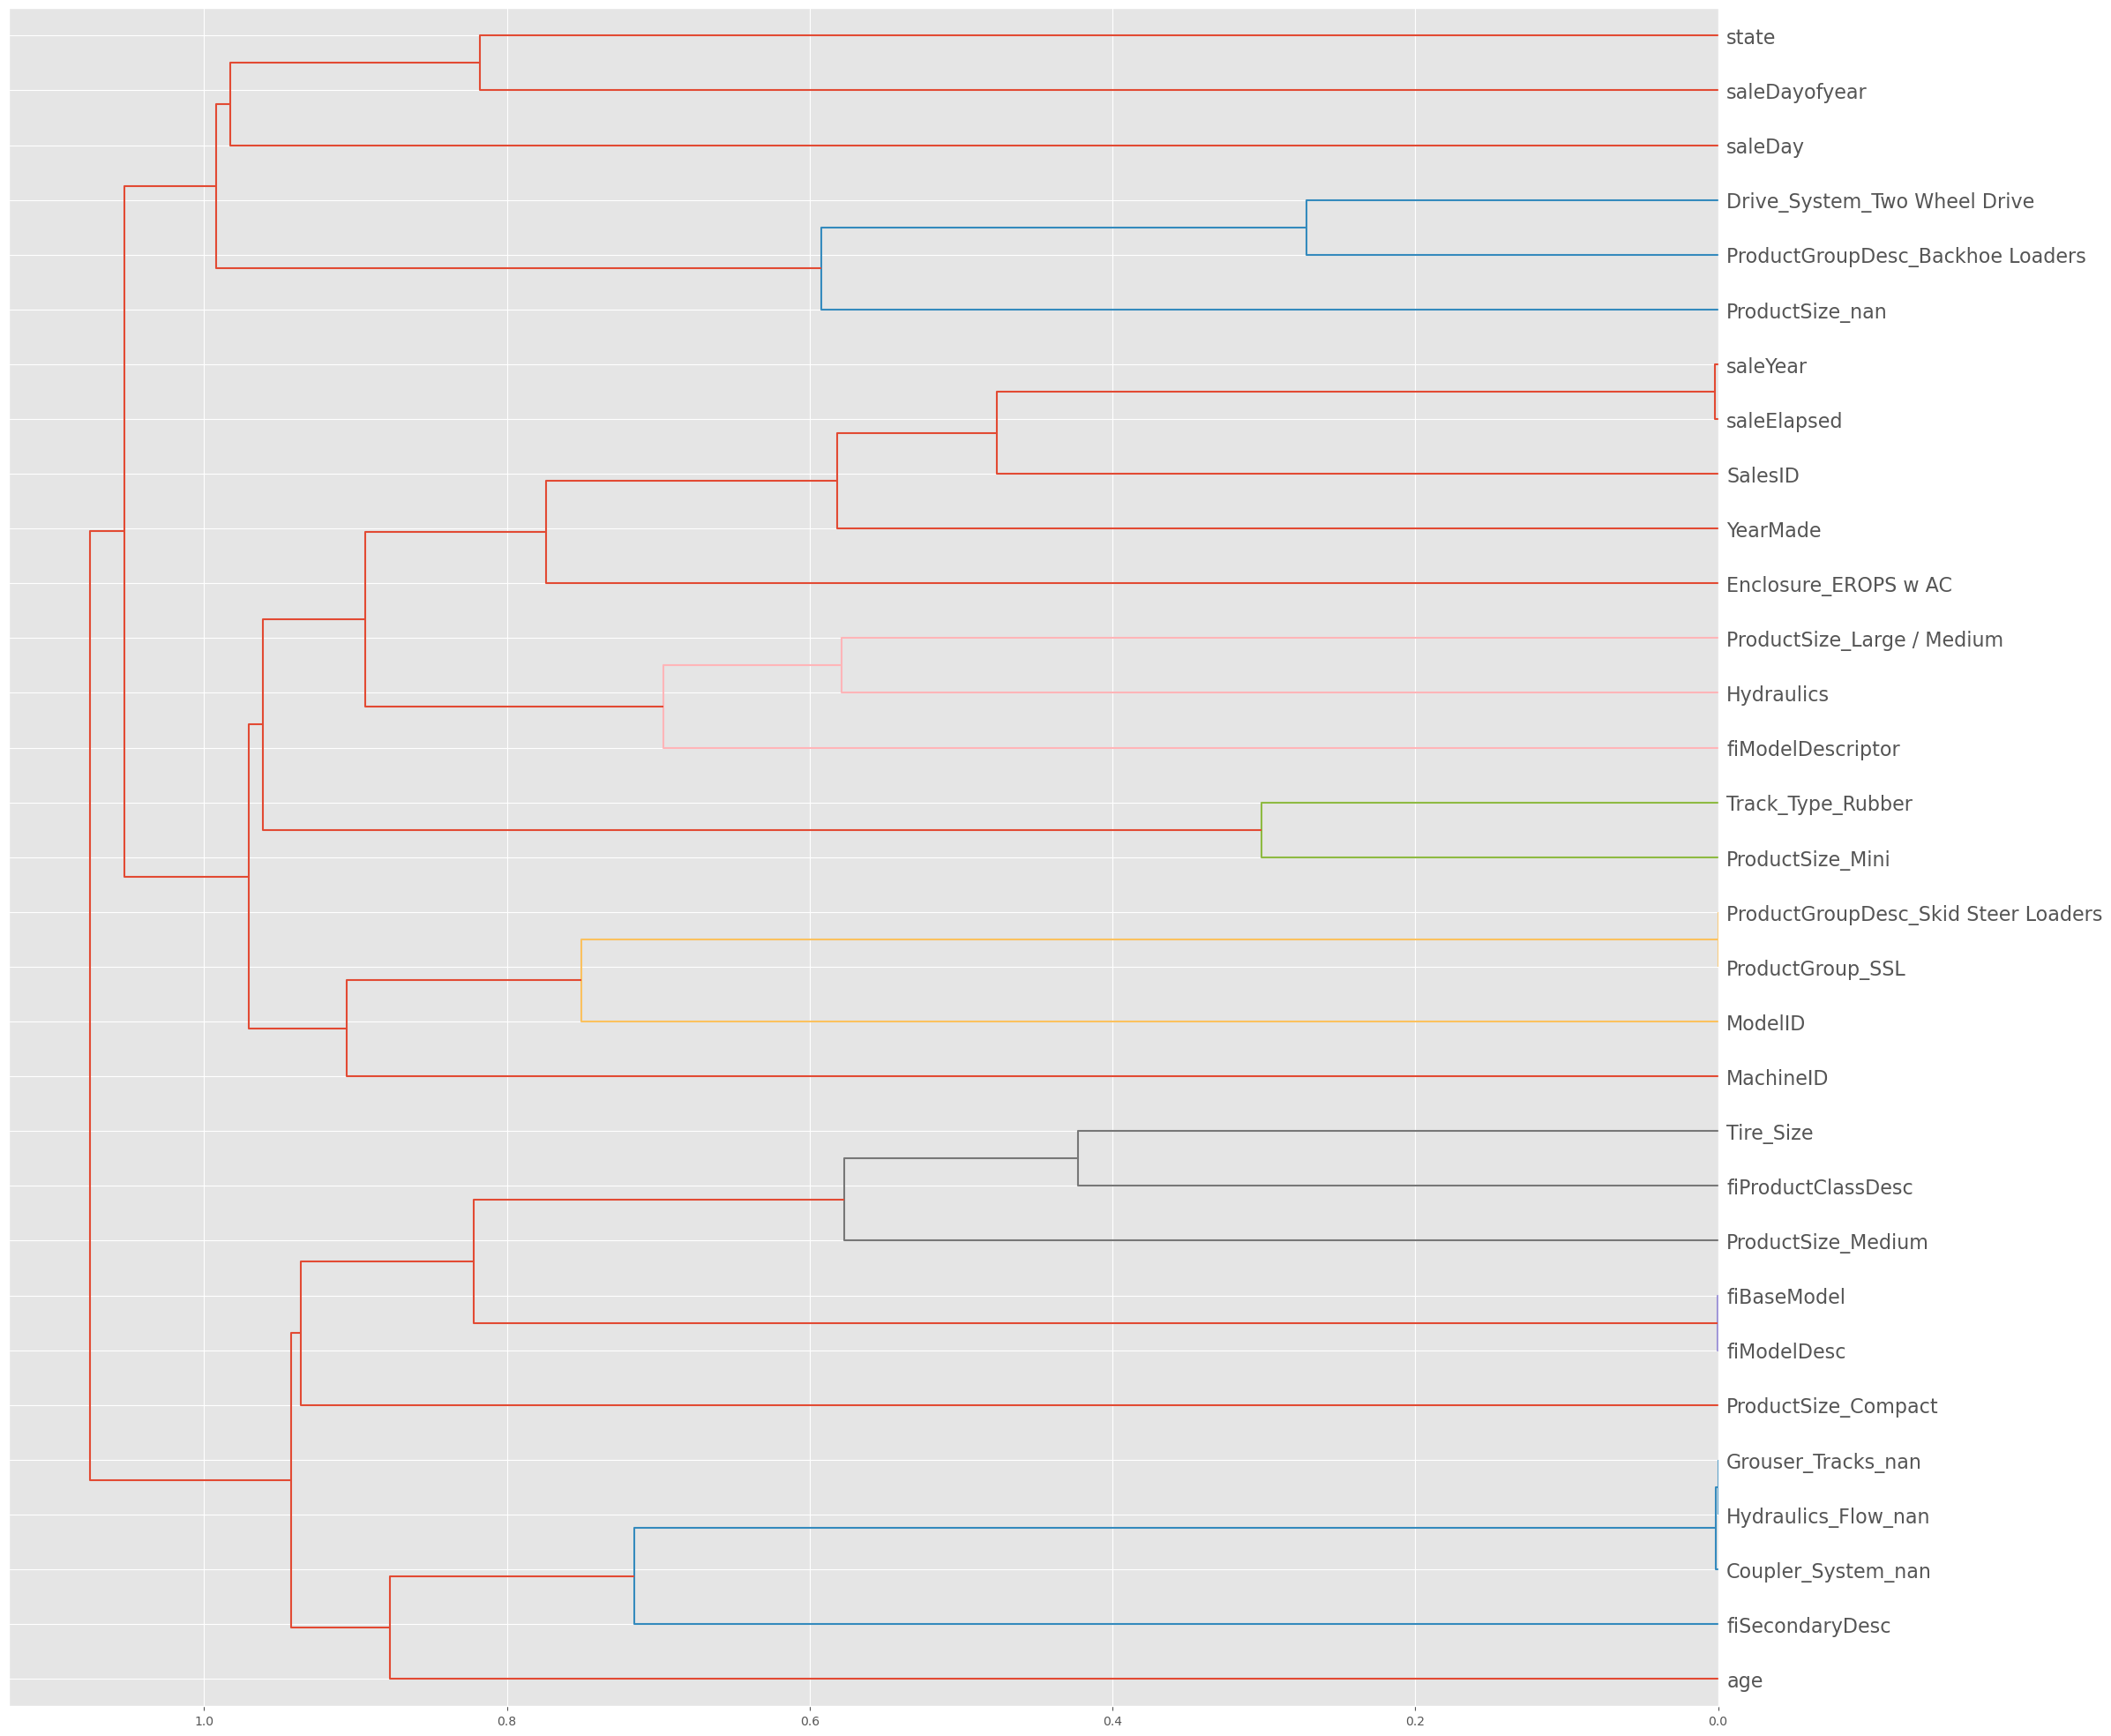

In [24]:
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X_keep).correlation, 4)
#corr = np.nan_to_num(corr)
corr_condensed = hc.distance.squareform(1-corr, checks=False)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(25,25))
dendrogram = hc.dendrogram(z, labels=X_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [25]:
X_keep = X_keep.drop(["saleYear", "fiBaseModel", "Grouser_Tracks_nan"], axis=1)

### Make model again

In [26]:
X_keep.shape

(412698, 28)

In [27]:
n_valid = 12000
n_trn = len(X_keep) - n_valid
X_train, X_valid = split_vals(X_keep, n_trn)
X_train.shape, X_valid.shape

((400698, 28), (12000, 28))

In [28]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1, min_samples_leaf=3, max_features=0.5, oob_score=True)

In [29]:
%time model.fit(X_train, y_train)

CPU times: total: 4min 57s
Wall time: 48.4 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_jobs=-1,
                      oob_score=True)

In [30]:
print_score(model)

[0.12451534739396121,
 0.2507415687802817,
 0.9647404938496034,
 0.8594603032809036,
 0.9105982470445757]

### Calculate feature importance again

In [31]:
fi = rf_feat_importance(model, X_keep)
fi[:10]

,cols,imp
0,Enclosure_EROPS w AC,0.169432
1,age,0.122171
4,ProductGroupDesc_Skid Steer Loaders,0.087188
3,fiProductClassDesc,0.080704
5,ModelID,0.064762
2,ProductGroup_SSL,0.057416
6,YearMade,0.053785
7,ProductSize_Mini,0.049310
10,fiModelDesc,0.044811
9,fiSecondaryDesc,0.035649


<Axes: ylabel='cols'>

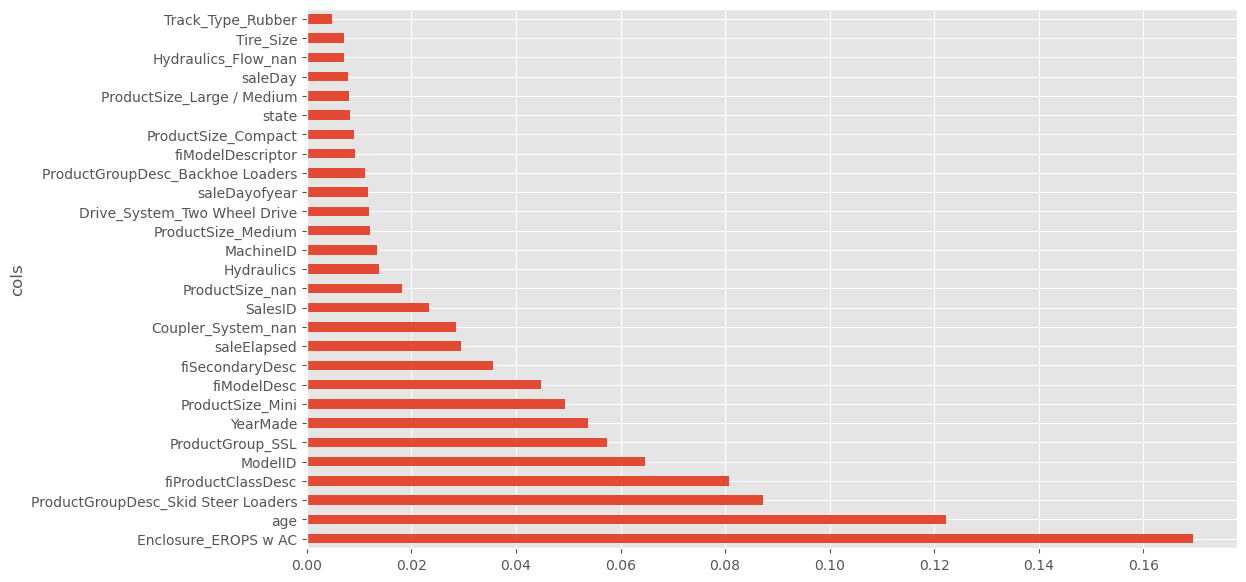

In [32]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(12, 7), legend=False)

## Confidence based on tree variance

In [33]:
raw_data = pd.read_feather("tmp/raw")
raw_data.SalePrice = np.log(raw_data.SalePrice)
raw_data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,None,None,None,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,None,EROPS w AC,None or Unspecified,None,None or Unspecified,None,None,None,None,None,None,None,2 Valve,None,None,None,None,None or Unspecified,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,None,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,None,EROPS w AC,None or Unspecified,None,None or Unspecified,None,None,None,None,None,None,None,2 Valve,None,None,None,None,23.5,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,None,None,None,None,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,None,OROPS,None or Unspecified,None,None,None,None,None,None,None,None,None,Auxiliary,None,None,None,None,None,None or Unspecified,None or Unspecified,None or Unspecified,Standard,None,None,None,None,None,None,None,None,None,None,None,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,None,-6E,None,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,None,EROPS w AC,None,None,None,None,None,None,None,None,None,None,2 Valve,None,None,None,None,None,None or Unspecified,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,None,None,None,None,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,None,EROPS,None or Unspecified,None,None,None,None,None,None,None,None,None,Auxiliary,None,None,None,None,None,None or Unspecified,None or Unspecified,None or Unspecified,Standard,None,None,None,None,None,None,None,None,None,None,None,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09


In [34]:
n_valid = 12000
n_trn = len(raw_data) - n_valid
train, valid = split_vals(raw_data, n_trn)
train.shape, valid.shape

((400698, 65), (12000, 65))

### How confident are we in Enclosure_Erops w AC (The most important feature) ?

In [35]:
raw_data.Enclosure.value_counts()

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

In [36]:
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_])

In [37]:
x = valid.copy()
x["pred"] = np.mean(preds, axis=0)
x["pred_std"] = np.std(preds, axis=0)

In [38]:
flds = ["Enclosure", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [39]:
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.899226,9.849680,0.242147
1,EROPS AC,9.305651,9.360792,0.423687
2,EROPS w AC,10.638201,10.586692,0.228280
3,OROPS,9.876225,9.837666,0.214032


***We are confident of results comming from data points with an Enclosure of Erops w AC (Small standard deviation == Small Confidence Interval)***

<Axes: ylabel='Enclosure'>

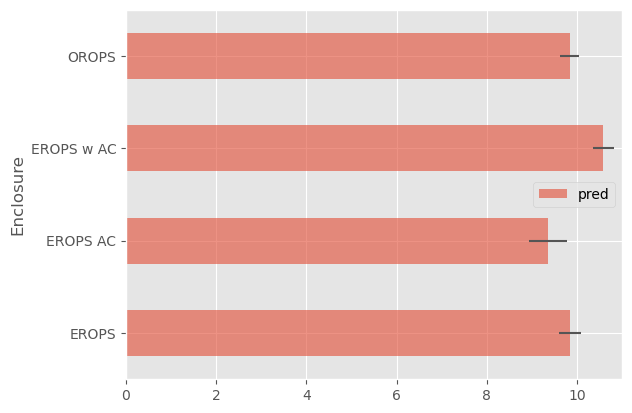

In [40]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11))

### How confident are we in ProductGroupDesc when it is "Skid Steer Loaders" ?

In [41]:
flds = ["ProductGroupDesc", "SalePrice", "pred", "pred_std"]
enc_summ = x[flds].groupby(flds[0], as_index=False).mean()

In [42]:
enc_summ

,ProductGroupDesc,SalePrice,pred,pred_std
0,Backhoe Loaders,9.976755,9.918499,0.170511
1,Motor Graders,10.687272,10.625378,0.229188
2,Skid Steer Loaders,9.302362,9.272360,0.194390
3,Track Excavators,10.298824,10.252305,0.247961
4,Track Type Tractors,10.395654,10.345532,0.248458
5,Wheel Loader,10.522935,10.483718,0.249210


***We are confident of results comming from data points with an ProductGroupDesc of Skid Steer Loaders (Small standard deviation == Small Confidence Interval)***

<Axes: ylabel='ProductGroupDesc'>

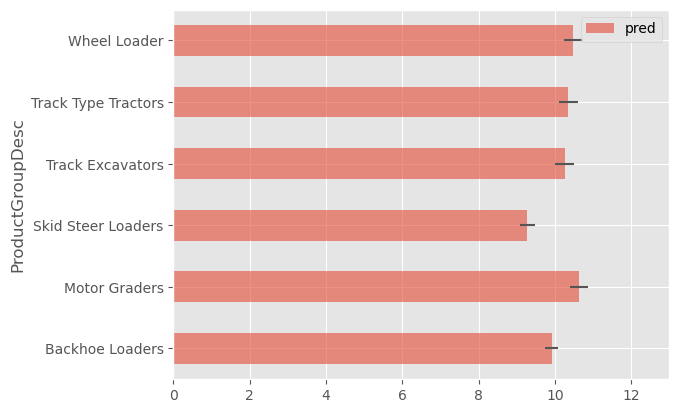

In [43]:
enc_summ.plot('ProductGroupDesc', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,13))